# `basic_horse_eda.ipynb`

### Author: Anthony Hein

#### Last updated: 12/7/2021

# Overview:

Perform basic exploratory data analysis.

---

## Setup

In [5]:
from datetime import datetime
import git
import os
import re
from typing import List
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
BASE_DIR = git.Repo(os.getcwd(), search_parent_directories=True).working_dir
BASE_DIR

'/Users/anthonyhein/Desktop/SML310/project'

---

## Load `horses_selected_trimmed_clean_augmented.csv`

In [3]:
horses_all = pd.read_csv(f"{BASE_DIR}/data/streamline/horses_selected_trimmed_clean_augmented.csv", low_memory=False) 
horses_all.head()

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,weight,res_win,res_place,res_show,finishing time,finishing time ratio
0,302858,Kings Return,6.0,4.0,0.600000,1,W P Mullins,D J Casey,1,0,...,NaN,King's Ride,Browne's Return,Deep Run,73,1,1,0,277.200000,1.000000
1,302858,Majestic Red I,6.0,5.0,0.047619,0,John Hackett,Conor O'Dwyer,2,8,...,NaN,Long Pond,Courtlough Lady,Giolla Mear,73,0,1,0,278.679948,1.005339
2,302858,Clearly Canadian,6.0,2.0,0.166667,0,D T Hughes,G Cotter,3,1.5,...,NaN,Nordico,Over The Seas,North Summit,71,0,0,0,278.957438,1.006340
3,302858,Bernestic Wonder,8.0,1.0,0.058824,0,E McNamara,J Old Jones,4,dist,...,NaN,Roselier,Miss Reindeer,Reindeer,73,0,0,0,284.507242,1.026361
4,302858,Beauty's Pride,5.0,6.0,0.038462,0,J J Lennon,T Martin,5,dist,...,NaN,Noalto,Elena's Beauty,Tarqogan,66,0,0,0,290.057045,1.046382


In [4]:
horses_all.shape

(202304, 24)

In [7]:
list(horses_all.columns)

['rid',
 'horseName',
 'age',
 'saddle',
 'decimalPrice',
 'isFav',
 'trainerName',
 'jockeyName',
 'position',
 'positionL',
 'dist',
 'outHandicap',
 'RPR',
 'TR',
 'OR',
 'father',
 'mother',
 'gfather',
 'weight',
 'res_win',
 'res_place',
 'res_show',
 'finishing time',
 'finishing time ratio']

---

## Basic EDA

In [32]:
horses_all_2 = horses_all.copy()
horses_all_2['position'] = horses_all['position'].map(lambda x: 14 if x == 40 else x)
horses_all_2 = horses_all_2.rename(columns={'decimalPrice': '1 / decimal price', 'outHandicap': 'handicap'})

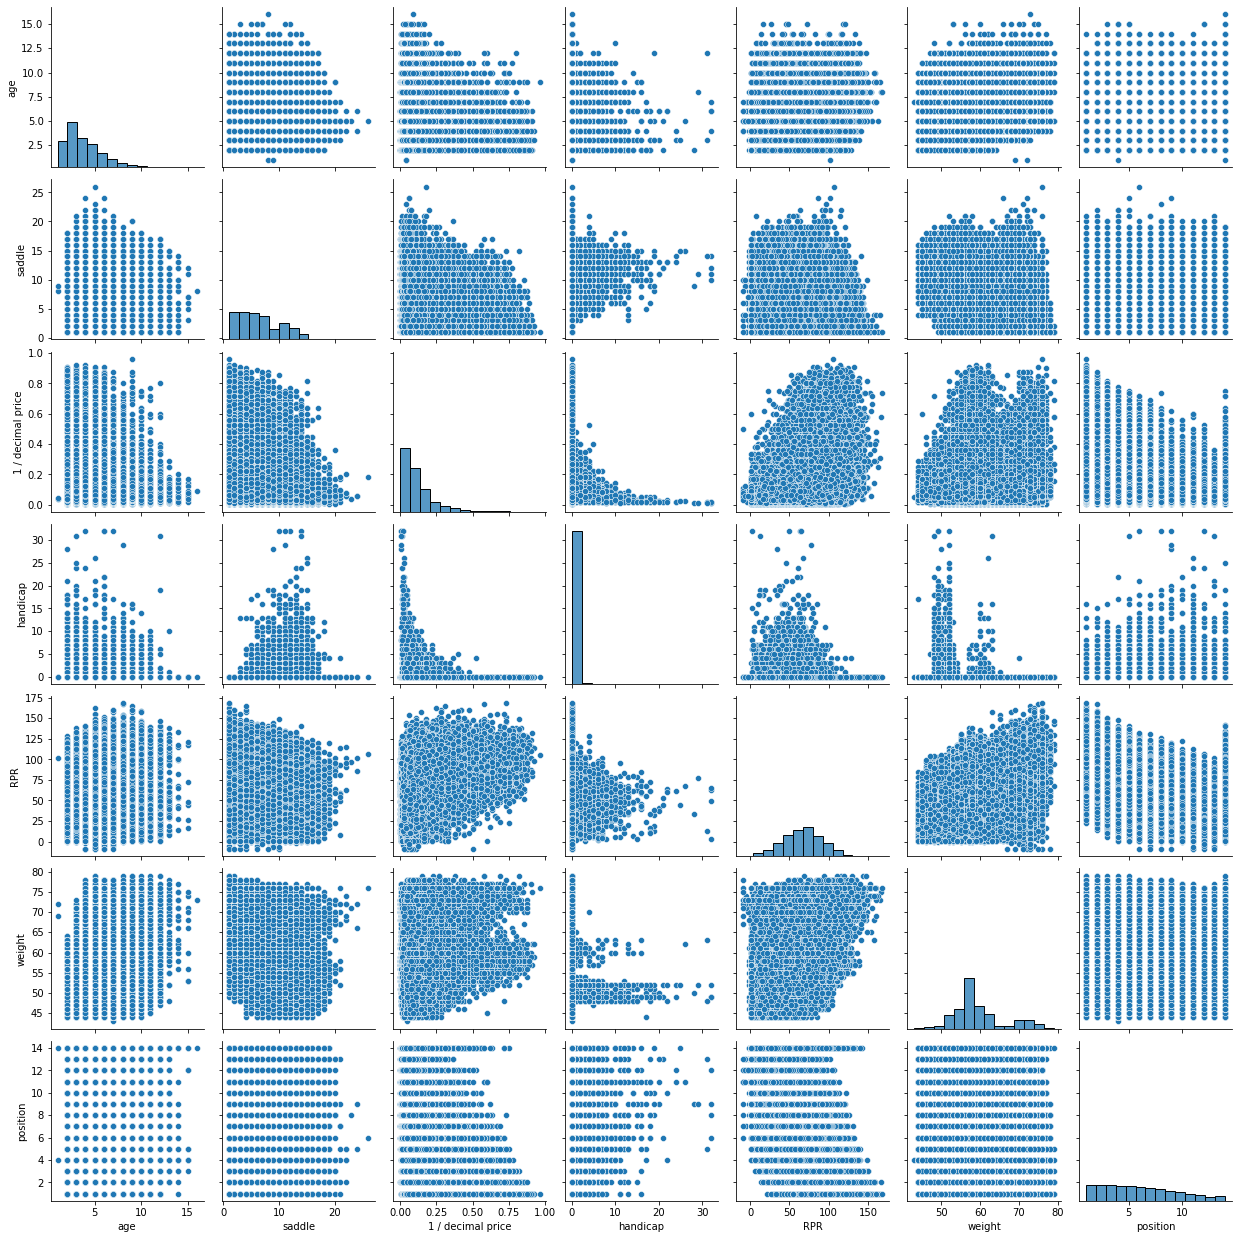

In [39]:
sns.pairplot(
    horses_all_2[['age', 'saddle', '1 / decimal price', 'handicap', 'RPR', 'weight', 'position']],
    diag_kind="hist",
    diag_kws=dict(stat='count', bins=14),
)
plt.savefig(f"{BASE_DIR}/figures/basic_horse_eda.png", dpi=300)
plt.show()

---